In [5]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects
from scipy.spatial import ConvexHull
from matplotlib.patches import Arc
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

In [6]:
with open('Fulham_Arsenal.json') as json_file:
    data = json.load(json_file)

event = []
minute = []
second = []
player = []
team = []
outcome = []
x = []
y = []
endX = []
endY = []
goal = []
passtype = []


for each in data['events']:
    event.append(each['type']['displayName'])
    try:
        minute.append(each['minute'])
    except:
        minute.append('')
    try:
        second.append(each['second'])
    except:
        second.append('')
    try:
        player.append(each['playerId'])
    except:
        player.append('')
    try:
        team.append(each['teamId'])
    except:
        team.append('')
    try:
        endX.append(each['endX'])
        endY.append(each['endY'])
    except:
        endX.append('')
        endY.append('')
    outcome.append(each['outcomeType']['displayName'])
    x.append(each['x'])
    y.append(each['y'])

    for key, value in each.items():
        passType = 'OpenPlay'
        if key == 'qualifiers':
            for item in value:
                if item['type']['displayName'] == 'IntentionalGoalAssist':
                    passType = item['type']['displayName']
                elif item['type']['displayName'] == 'BigChanceCreated':
                    passType = item['type']['displayName']
                elif item['type']['displayName'] == 'Assisted':
                    passType = item['type']['displayName']
            passtype.append(passType)
                
events = pd.DataFrame({'Event':event, 'Minute':minute, 'Second':second, 'Player':player, 'Team':team, 'Outcome':outcome, 'x':x, 'y':y,
                      'endX':endX, 'endY':endY, 'passtype':passtype})

In [7]:
# data

In [8]:
# '134143': 'Stuart Dallas'
# '82877': 'Luke Ayling'

In [9]:
events.Event.value_counts()

Pass               1226
BallRecovery         88
Foul                 48
BallTouch            44
Interception         28
Aerial               26
Tackle               23
TakeOn               22
Clearance            22
Dispossessed         14
Challenge            12
CornerAwarded        10
BlockedPass           9
SavedShot             9
Save                  9
KeeperPickup          7
SubstitutionOff       6
SubstitutionOn        6
End                   6
MissedShots           5
Card                  4
OffsideGiven          4
Start                 4
OffsidePass           4
OffsideProvoked       4
Goal                  3
FormationSet          2
Error                 1
ShotOnPost            1
KeeperSweeper         1
Name: Event, dtype: int64

In [10]:
mask = ((events['Player']==134143) & (events['Event'] == 'Tackle')) | ((events['Player']==134143) & (events['Event'] == 'Challenge')) | ((events['Player']==134143) & (events['Event'] == 'Interception')) | ((events['Player']==134143) & (events['Event'] == 'BlockedPass')) | ((events['Player']==134143) & (events['Event'] == 'BallRecovery')) | ((events['Player']==134143) & (events['Event'] == 'Foul'))
dallas = events.loc[mask]
dallas

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype


In [11]:
mask = ((events['Player']==82877) & (events['Event'] == 'Tackle')) | ((events['Player']==82877) & (events['Event'] == 'Challenge')) | ((events['Player']==82877) & (events['Event'] == 'Interception')) | ((events['Player']==82877) & (events['Event'] == 'BlockedPass')) | ((events['Player']==82877) & (events['Event'] == 'BallRecovery')) | ((events['Player']==82877) & (events['Event'] == 'Foul'))
ayling = events.loc[mask]
ayling

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype


In [12]:
defpoints = dallas[['x', 'y']].values

In [13]:
hull = ConvexHull(dallas[['x','y']])

ValueError: No points given

In [14]:
defpoints1 = ayling[['x', 'y']].values

In [15]:
hull1 = ConvexHull(ayling[['x','y']])

ValueError: No points given

In [16]:
# background = "#313332"
# line = '#696969'
# text_color ='white'
# touches = '#f62681'
# assisted = "#45c7e8"
# goal = '#59c08a'
# title_font = "BBC Reith Sans"
# body_font = "BBC Reith Sans"

# #Plot the X & Y location with dots
# pitch = Pitch(figsize=(15,15),orientation='vertical',view='full',layout=(1, 2),goal_type='box',pitch_type='opta',
#               pitch_color=background, line_color=line,constrained_layout=False)


# fig, ax = pitch.draw()
# ax[0].scatter(dallas['y'],dallas['x'],color='lightblue', s=100, zorder=12,alpha=0.7, ec=background,lw=1.5)

# for simplex in hull.simplices:
#     #Draw a black line between each
#     ax[0].plot(defpoints[simplex, 1], defpoints[simplex, 0], 'k-', alpha=0.5, lw=1, c='lightblue')
#     ax[0].fill(defpoints[hull.vertices,1], defpoints[hull.vertices,0], 'k', alpha=0.01, color='lightblue')
    
# ax[0].scatter(ayling['y'],ayling['x'],color='#45c7e8', s=100, zorder=12,alpha=0.7, ec=background,lw=1.5)

# for simplex in hull1.simplices:
#     #Draw a black line between each
#     ax[0].plot(defpoints1[simplex, 1], defpoints1[simplex, 0], 'k-', alpha=0.5, lw=1, c='#45c7e8')
#     ax[0].fill(defpoints1[hull1.vertices,1], defpoints1[hull1.vertices,0], 'k', alpha=0.01, color='#45c7e8')

    
# plt.rcParams['axes.facecolor']=background
# plt.rcParams['savefig.facecolor']=background
# plt.savefig("convex",bbox_inches="tight",dpi=200);

In [17]:
mask = ((events['Team']==19) & (events['Event'] == 'Aerial'))
aerial = events.loc[mask]
aerial

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype


In [18]:
mask = ((events['Team']==19) & (events['Event'] == 'Aerial') & (events['Outcome'] == 'Successful'))
suc_aerial = events.loc[mask]
suc_aerial

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY,passtype


In [19]:
import matplotlib.colors

In [20]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [21]:
cmap = ListedColormap(['#313332', '#5b433d', '#714237', '#874131', '#9c3e2b', '#b13925', '#c5311d', '#da2314', '#ef0107'])

NameError: name 'hull' is not defined

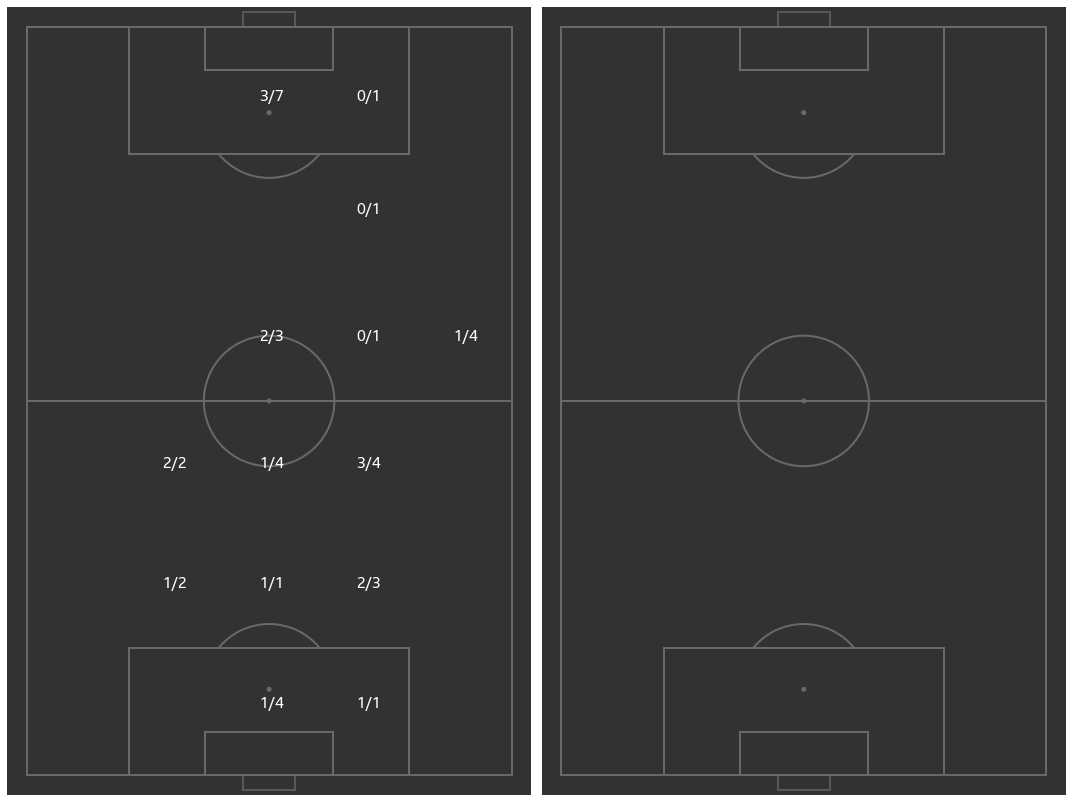

In [22]:
csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

background = "#313332"
line = '#696969'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
goal = '#59c08a'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"


pitch = Pitch(pitch_type='opta', figsize=(15, 15), layout=(1, 2), line_zorder=2, goal_type='box',
              pitch_color=background, line_color=line, orientation='vertical')
# draw
fig, ax = pitch.draw()
# heatmap specified by (nx, ny) for horizontal pitch
bins = [(12, 8)]
for i, bin in enumerate(bins):
    bin_statistic = pitch.bin_statistic(suc_aerial.x, suc_aerial.y, statistic='count', bins=bin)
    # draw
    pitch.heatmap(bin_statistic, ax=ax[i], cmap=cmap, edgecolors=None, alpha=0.8)


ax[0].text(52, 9, "1/4",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(52, 25, "1/1",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 25, "2/3",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 41, "3/4",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 58, "0/1",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 75, "0/1",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 90, "0/1",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(52, 41, "1/4",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(72, 25, "1/2",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(72, 41, "2/2",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(52, 58, "2/3",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(12, 58, "1/4",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(52, 90, "3/7",fontsize=15, fontfamily=body_font, color=text_color)
ax[0].text(32, 9, "1/1",fontsize=15, fontfamily=body_font, color=text_color)


#----------

ax[1].scatter(dallas['y'],dallas['x'],color='lightblue', s=100, zorder=12,alpha=0.7, ec=background,lw=1.5)

for simplex in hull.simplices:
    #Draw a black line between each
    ax[1].plot(defpoints[simplex, 1], defpoints[simplex, 0], 'k-', alpha=0.5, lw=1, c='lightblue')
    ax[1].fill(defpoints[hull.vertices,1], defpoints[hull.vertices,0], 'k', alpha=0.01, color='lightblue')
    
ax[1].scatter(ayling['y'],ayling['x'],color='#45c7e8', s=100, zorder=12,alpha=0.7, ec=background,lw=1.5)

for simplex in hull1.simplices:
    #Draw a black line between each
    ax[1].plot(defpoints1[simplex, 1], defpoints1[simplex, 0], 'k-', alpha=0.5, lw=1, c='#45c7e8')
    ax[1].fill(defpoints1[hull1.vertices,1], defpoints1[hull1.vertices,0], 'k', alpha=0.01, color='#45c7e8')
    
    
n = fig.text(0.031, 0.875, "Leeds United",fontsize=30, fontfamily=body_font, color='lightblue', weight='bold',zorder=2, **csfont)
fig.text(0.211, 0.875, "vs Fulham",fontsize=25, fontfamily=body_font, color=text_color, weight='bold',zorder=2, **csfont)
n.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
fig.text(0.33, 0.875, " English Premier League 2020/21 | Sat 19 Sep 2020",fontsize=18, fontfamily=body_font, color=text_color,zorder=2, **csfont)
n1 = fig.text(0.031, 0.855, "Aerial Duels (won/competed)",fontsize=14, fontfamily=body_font, color='white',zorder=2, **csfont)
n1.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
n2 = fig.text(0.523, 0.855, "Possession Won (Dallas | Ayling)",fontsize=14, fontfamily=body_font, color='white',zorder=2, **csfont)
n2.set_path_effects([path_effects.withStroke(linewidth=4,foreground=background)])
info_string = '@jonollington'
fig.text(0.9, 0.135, info_string, color='#ffffff', ha='left', va='bottom', fontsize=12, **csfont)

#arrow
arrow="Simple,tail_width=0.4,head_width=1.3,head_length=0.9"
ax2 = fig.add_axes([0.48,0.17,0.04,0.3])
ax2.axis("off")
ax2.annotate('', (0.48,0.7),(0.48,0), zorder=10, arrowprops=dict(arrowstyle=arrow,
            linewidth=0.2,  color='#ffffff',alpha=0.7))
    
plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("trial",bbox_inches="tight",dpi=200);

In [50]:
x = 12

In [51]:
x /= 6-2

In [52]:
x

3.0